In [ ]:
pip install scipy statsmodels arch scikit-learn numpy pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 13.0 MB/s eta 0:00:00


In [11]:
from arch import arch_model
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv("Raw Data/IN_Cleaned.csv")
df['Log_Returns'] = np.log(df['PX_LAST'] / df['PX_LAST'].shift(1))
df = df.dropna()

model = arch_model(
    df['Log_Returns'],
    vol='Garch',
    p=1,
    q=1,
    dist='normal',
    rescale=False,
    x=df[['PX_VOLUME_x']]
    )
model_fit = model.fit(disp="off")
df['GARCH_Volatility'] = model_fit.conditional_volatility
residuals = model_fit.resid

df['Sigma_Annualized'] = df['GARCH_Volatility'] * np.sqrt(252)


t_stat, p_value = ttest_rel(df['Sigma_Annualized'], df['NIFVIX'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)

rmse = mean_squared_error(df['NIFVIX'],df['Sigma_Annualized'], squared=False)
mae = mean_absolute_error(df['NIFVIX'],df['Sigma_Annualized'])
print("Mean Sigma:", df['NIFVIX'].mean()  )
print("RMSE:", rmse)
print("MAE:", mae)

t-statistic: -18.936129557267773
p-value: 2.5692758733338166e-69
Durbin-Watson statistic: 1.9499383760673377
Mean Sigma: 0.17927571362799266
RMSE: 0.05893139901240032
MAE: 0.043515554281994426


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<ipython-input-12-50a11f957e79>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


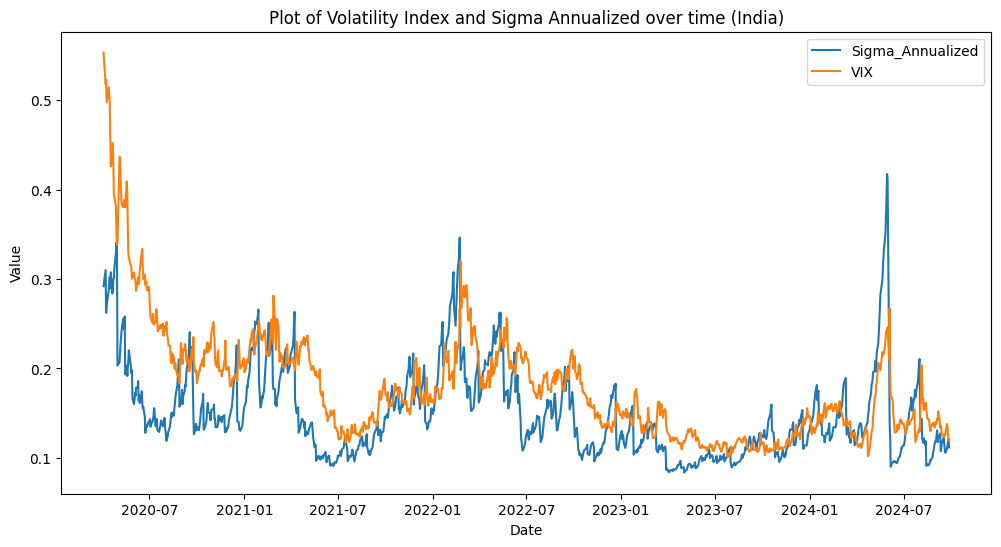

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

df['Date'] = pd.to_datetime(df['Date'])
plt.plot('Date', 'Sigma_Annualized', data=df)
plt.plot('Date', 'NIFVIX', data=df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot of Volatility Index and Sigma Annualized over time (India)')
plt.legend(['Sigma_Annualized', 'VIX'])
plt.show()
